In [72]:
import pandas as pd
df= pd.read_csv("Clean_Dataset.csv")

In [73]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
154689,154689,Indigo,6E-6684,Hyderabad,Night,zero,Night,Delhi,Economy,2.25,21.0,2694.0
154690,154690,Indigo,6E-2349,Hyderabad,Night,zero,Late_Night,Delhi,Economy,2.25,21.0,2694.0
154691,154691,Air_India,AI-559,Hyderabad,Early_Morning,zero,Morning,Delhi,Economy,2.50,21.0,2696.0
154692,154692,Indigo,6E-2248,Hyderabad,Afternoon,zero,Evening,Delhi,Economy,2.25,21.0,3191.0


In [74]:
df.airline.value_counts()

,count
airline,
Vistara,48064
Air_India,36012
Indigo,30534
GO_FIRST,19585
AirAsia,12971
SpiceJet,7528


In [75]:
df.source_city.value_counts()

,count
source_city,
Delhi,43027
Mumbai,41038
Bangalore,35620
Kolkata,32874
Hyderabad,2134
Hyde,1


In [76]:
df.destination_city.value_counts()

,count
destination_city,
Delhi,29710
Mumbai,26828
Bangalore,25744
Hyderabad,25040
Kolkata,24315
Chennai,23056


In [77]:
df.departure_time.value_counts()

,count
departure_time,
Evening,35982
Morning,35376
Early_Morning,35046
Afternoon,26312
Night,20919
Late_Night,1058


In [78]:
df.arrival_time.value_counts()

,count
arrival_time,
Night,46244
Evening,38377
Morning,30984
Afternoon,20627
Early_Morning,9429
Late_Night,9032


In [79]:
df.stops.value_counts()

,count
stops,
one,123546
zero,21931
two_or_more,9216


In [80]:
df["class"].value_counts()

,count
class,
Economy,154693


In [81]:
df["duration"].min()


0.83

In [82]:
df["duration"].max()

47.75

In [83]:
df["duration"].median()

10.17

In [84]:
#Preprocessing

In [85]:
df=df.drop("Unnamed: 0",axis=1)
df=df.drop("flight",axis=1)

df["class"]=df["class"].apply(lambda x: 1 if x== "Business" else 0)
df["class"]=df["class"].apply(lambda x: 1 if x== "Business" else 0)

In [86]:
df.stops=pd.factorize(df.stops)[0]

In [87]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1.0,5953.0
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1.0,5953.0
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1.0,5956.0
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1.0,5955.0
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...
154689,Indigo,Hyderabad,Night,0,Night,Delhi,0,2.25,21.0,2694.0
154690,Indigo,Hyderabad,Night,0,Late_Night,Delhi,0,2.25,21.0,2694.0
154691,Air_India,Hyderabad,Early_Morning,0,Morning,Delhi,0,2.50,21.0,2696.0
154692,Indigo,Hyderabad,Afternoon,0,Evening,Delhi,0,2.25,21.0,3191.0


In [88]:
# One-hot encoding each categorical column and joining with the original DataFrame
airline_dummies = pd.get_dummies(df.airline, prefix="airline")
source_dummies = pd.get_dummies(df.source_city, prefix="source")
destination_dummies = pd.get_dummies(df.destination_city, prefix="dest")
arrival_dummies = pd.get_dummies(df.arrival_time, prefix="arrival")
departure_dummies = pd.get_dummies(df.departure_time, prefix="departure")

# Dropping the original categorical columns and joining the dummy variables
df = df.drop(["airline", "source_city", "destination_city", "arrival_time", "departure_time"], axis=1)
df = df.join([airline_dummies, source_dummies, destination_dummies, arrival_dummies, departure_dummies])


In [89]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1.0,5953.0,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1.0,5953.0,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1.0,5956.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1.0,5955.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1.0,5955.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154689,0,0,2.25,21.0,2694.0,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
154690,0,0,2.25,21.0,2694.0,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
154691,0,0,2.50,21.0,2696.0,False,True,False,False,False,...,False,False,True,False,False,True,False,False,False,False
154692,0,0,2.25,21.0,3191.0,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,False


In [90]:
df = df.dropna()
df = df.astype(int)


In [91]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154688,0,0,2,21,2694,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
154689,0,0,2,21,2694,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
154690,0,0,2,21,2694,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
154691,0,0,2,21,2696,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [92]:
#Training Regression Model

In [93]:
!pip install scikit-learn


In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [95]:
X,y=df.drop("price",axis=1),df.price

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [97]:
reg = RandomForestRegressor(n_jobs=-1)


reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [98]:
reg.score(X_test,y_test)

0.8208634615558772

In [99]:
import math
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

y_pred=reg.predict(X_test)

print("R2",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE",math.sqrt(mean_squared_error(y_test,y_pred)))


R2 0.8208634615558772
MAE: 729.1096298181279
MSE: 2413559.4064644272
RMSE 1553.5634542767884


Text(0.5, 1.0, 'Prediction VS Actual Price')

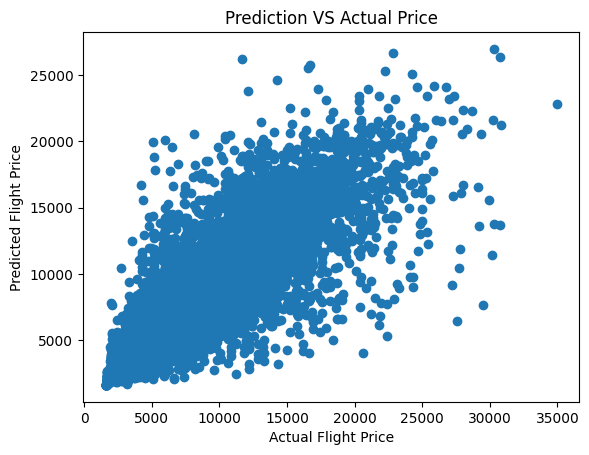

In [100]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction VS Actual Price")

In [101]:
df.price.describe()

,price
count,154693.000000
mean,6653.731126
std,3703.761597
min,1603.000000
25%,4190.000000
50%,5939.000000
75%,7813.000000
max,40354.000000


In [102]:
importances= dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(),key=lambda x:x[1],reverse= True)

sorted_importances

[('days_left', 0.5211057143770883),
 ('duration', 0.1620076839698864),
 ('airline_AirAsia', 0.032453765667811815),
 ('stops', 0.027287305762188952),
 ('airline_Indigo', 0.022894859589134273),
 ('source_Kolkata', 0.019975899120283188),
 ('airline_GO_FIRST', 0.018890073891874932),
 ('airline_Vistara', 0.01428251369012532),
 ('source_Bangalore', 0.011648857574180483),
 ('source_Delhi', 0.011454928113178876),
 ('dest_Hyderabad', 0.01107317056041469),
 ('airline_SpiceJet', 0.011005106025929221),
 ('source_Mumbai', 0.010889407873270139),
 ('dest_Kolkata', 0.01088583534705974),
 ('dest_Delhi', 0.009526973921779121),
 ('arrival_Evening', 0.009471540979818801),
 ('departure_Morning', 0.009340681592664374),
 ('airline_Air_India', 0.008947574169411854),
 ('dest_Chennai', 0.008584199306475904),
 ('dest_Bangalore', 0.008504213459445792),
 ('arrival_Afternoon', 0.008429211609522988),
 ('departure_Afternoon', 0.007796490151138058),
 ('dest_Mumbai', 0.0077840938905040895),
 ('arrival_Morning', 0.00682

<BarContainer object of 10 artists>

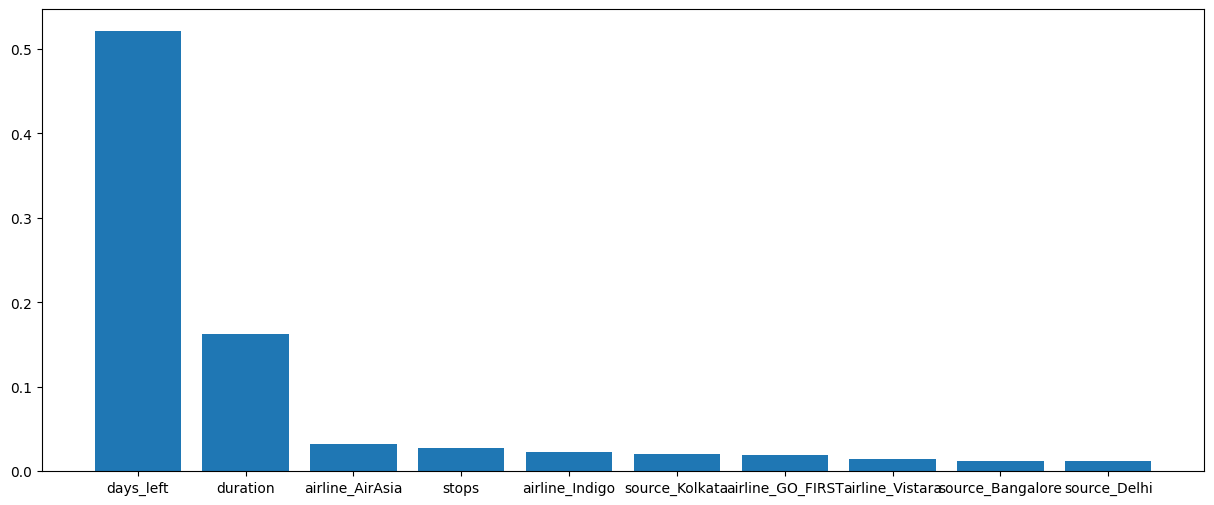

In [103]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]],[x[1] for x in sorted_importances[:10]])

In [ ]:
from sklearn.model_selection import GridSearchCV

reg= RandomForestRegressor(n_jobs=-1)

param_grid={
    "n_estimators":[100,200,300],
    "max_depth":[None, 10, 20, 30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4],
    "max_features": ["auto","sqrt"]
}
grid_search= GridSearchCV(reg, param_grid ,cv=5)
grid_search.fit(X_train, y_train)
best_params= grid_search.best_params_

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist={
    "n_estimators":randint(100,300),
    "max_depth":[None, 10, 20, 30],
    "min_samples_split":randint(2,11),
    "min_samples_leaf":randint(1,5),
    "max_features": [1.0,"auto","sqrt"]
}

reg= RandomForestRegressor(n_jobs=-1)

random_search= RandomizedSearchCV(estimator=reg, param_distributions=param_dist,n_iter=2,cv=3,scoring="neg_mean_squared_error",verbose=2,random_state=10,n_jobs=-1)

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator'

In [105]:
best_regressor = random_search.best_estimator_
best_regressor.score(X_test,y_test)

0.8335289617917769

In [106]:
import math
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

y_pred=best_regressor.predict(X_test)

print("R2",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE",math.sqrt(mean_squared_error(y_test,y_pred)))


R2 0.8335289617917769
MAE: 718.6198773375737
MSE: 2242913.3869675808
RMSE 1497.635932717822


Text(0.5, 1.0, 'Prediction VS Actual Price')

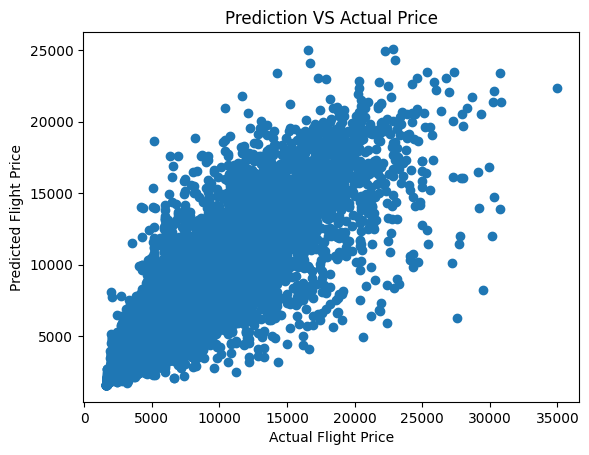

In [107]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Prediction VS Actual Price")